#Aula 6:

In [1338]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1339]:
import pandas as pd
import numpy as np

from random import *

import seaborn as sns

##Criando um DataFrame:

In [1340]:
numero_de_alunos = 20

data = {
    'Id': np.arange(1, numero_de_alunos + 1).tolist(),
    'Altura': [159, 171, 158, 162, 162, 177, 160, 175,
               168, 171, 178, 178, 173, 177, 164, 190, 
               175, 150, 145, 165]}
#transforma o dicionario dentro do dataframe
df = pd.DataFrame(data)

df

,Id,Altura
0,1,159
1,2,171
2,3,158
3,4,162
4,5,162
5,6,177
6,7,160
7,8,175
8,9,168
9,10,171


##Randômica:

In [1341]:
amostra_randomica = df.sample(5)
amostra_randomica

,Id,Altura
5,6,177
8,9,168
7,8,175
17,18,150
4,5,162


##Checagem:

In [1342]:
df['Altura'].describe()

count     20.00000
mean     167.90000
std       10.71595
min      145.00000
25%      161.50000
50%      169.50000
75%      175.50000
max      190.00000
Name: Altura, dtype: float64

In [1343]:
amostra_randomica['Altura'].describe()

count      5.000000
mean     166.400000
std       10.922454
min      150.000000
25%      162.000000
50%      168.000000
75%      175.000000
max      177.000000
Name: Altura, dtype: float64

In [1344]:
def amostra_sistematica(df, step):

  indexes = np.arange(0, len(df), step=step)
  amostra_sistematica = df.iloc[indexes]
  return amostra_sistematica

In [1345]:
df_sistematica = df.sort_values('Altura').reset_index(drop = True)

In [1346]:
df_sistematica.head(3)

,Id,Altura
0,19,145
1,18,150
2,3,158


In [1347]:
am_sis = amostra_sistematica(df_sistematica, 3)

am_sis

,Id,Altura
0,19,145
3,1,159
6,5,162
9,9,168
12,13,173
15,14,177
18,12,178


##Checagem:

In [1348]:
df['Altura'].describe()

count     20.00000
mean     167.90000
std       10.71595
min      145.00000
25%      161.50000
50%      169.50000
75%      175.50000
max      190.00000
Name: Altura, dtype: float64

In [1349]:
am_sis['Altura'].describe()

count      7.000000
mean     166.000000
std       11.718931
min      145.000000
25%      160.500000
50%      168.000000
75%      175.000000
max      178.000000
Name: Altura, dtype: float64

##Agrupada:

In [1350]:
df['Grupo'] = np.select([
    (df['Id'] <= 5),
    (df['Id'] > 5) & (df['Id'] <= 10),
    (df['Id'] > 10) & (df['Id'] <= 15),
    (df['Id'] > 15) & (df['Id'] <= 20)],
    [1, 2, 3, 4])

In [1351]:
df.sample(3)

,Id,Altura,Grupo
18,19,145,4
5,6,177,2
17,18,150,4


In [1352]:
grupos_escolhidos = sample([1, 2, 3, 4], k = 2)

In [1353]:
grupos_escolhidos

[4, 1]

In [1354]:
df_grupo_amostra = df[(df['Grupo'] == grupos_escolhidos[0])|(df['Grupo'] == grupos_escolhidos[1])].sample(4)

In [1355]:
df_grupo_amostra

,Id,Altura,Grupo
19,20,165,4
17,18,150,4
0,1,159,1
3,4,162,1


##Checagem:

In [1356]:
df['Altura'].describe()

count     20.00000
mean     167.90000
std       10.71595
min      145.00000
25%      161.50000
50%      169.50000
75%      175.50000
max      190.00000
Name: Altura, dtype: float64

In [1357]:
df_grupo_amostra['Altura'].describe()

count      4.000000
mean     159.000000
std        6.480741
min      150.000000
25%      156.750000
50%      160.500000
75%      162.750000
max      165.000000
Name: Altura, dtype: float64

##Estratificada:

In [1358]:
df['grupo_estrat'] = np.select(
  [(df['Altura'] <= 160),
    (df['Altura']> 160) & (df['Altura'] <= 170),
    (df['Altura']> 170)],
[1, 2, 3])
df

,Id,Altura,Grupo,grupo_estrat
0,1,159,1,1
1,2,171,1,3
2,3,158,1,1
3,4,162,1,2
4,5,162,1,2
5,6,177,2,3
6,7,160,2,1
7,8,175,2,3
8,9,168,2,2
9,10,171,2,3


In [1359]:
df['grupo_estrat'].value_counts()

3    10
1     5
2     5
Name: grupo_estrat, dtype: int64

In [1360]:
#ele pega duas amostras sample/random do grupo 1 e 2, e quatro amostras sample/randoms do grupo 3, mantendo a proporção pra não enviezá-lo
df_estra = df[df['grupo_estrat'] == 1].sample(2).append(df[df['grupo_estrat'] == 2].sample(2)).append(df[df['grupo_estrat'] == 3].sample(4))

In [1361]:
df_estra

,Id,Altura,Grupo,grupo_estrat
18,19,145,4,1
0,1,159,1,1
3,4,162,1,2
4,5,162,1,2
5,6,177,2,3
15,16,190,4,3
12,13,173,3,3
1,2,171,1,3


##Comparação:

In [1362]:
df['Altura'].describe()

count     20.00000
mean     167.90000
std       10.71595
min      145.00000
25%      161.50000
50%      169.50000
75%      175.50000
max      190.00000
Name: Altura, dtype: float64

In [1363]:
df_estra['Altura'].describe()

count      8.000000
mean     167.375000
std       13.511239
min      145.000000
25%      161.250000
50%      166.500000
75%      174.000000
max      190.000000
Name: Altura, dtype: float64


##Leitura de Bases:

In [1364]:
df_copa_partidas = pd.read_csv('/content/WorldCupMatches.csv')

In [1365]:
df_copa = pd.read_csv('/content/WorldCups.csv', thousands = '.')

##Tratamento da Base

###Partidas

In [1366]:
df_copa_partidas.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1958.0,29 Jun 1958 - 15:00,Final,Rasunda Stadium,Solna,Brazil,5.0,2.0,Sweden,,49737.0,2.0,1.0,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482.0,1343.0,BRA,SWE
1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,1954.0,16 Jun 1954 - 18:00,Group 1,Charmilles,Geneva,Brazil,5.0,0.0,Mexico,,13470.0,4.0,0.0,WYSSLING Paul (SUI),SCHONHOLZER Ernest (SUI),DA COSTA VIEIRA Jose (POR),211.0,1249.0,BRA,MEX
1078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1367]:
df_copa_partidas_res = df_copa_partidas[df_copa_partidas['MatchID'].notna()]

In [1368]:
df_copa_partidas_res.sample(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
105,1958.0,08 Jun 1958 - 19:00,Group 2,Idrottsparken,Norrk�Ping,France,7.0,3.0,Paraguay,,16518.0,2.0,2.0,GARDEAZABAL Juan (ESP),GRIFFITHS Benjamin (WAL),BROZZI Juan (ARG),220.0,1386.0,FRA,PAR
210,1970.0,06 Jun 1970 - 16:00,Group 3,Jalisco,Guadalajara,Romania,2.0,1.0,Czechoslovakia,,56818.0,0.0,1.0,DE LEO Diego (MEX),EMSBERGER Gyula (HUN),LORAUX Vital (BEL),250.0,1919.0,ROU,TCH
26,1934.0,31 May 1934 - 16:30,Quarter-finals,Stadio Benito Mussolini,Turin,Czechoslovakia,3.0,2.0,Switzerland,,12000.0,1.0,1.0,BERANEK Alois (AUT),MOHAMED Youssuf (EGY),BAERT Jacques (FRA),418.0,1143.0,TCH,SUI
592,2002.0,04 June 2002 - 18:00,Group H,Saitama Stadium 2002,Saitama,Japan,2.0,2.0,Belgium,,55256.0,0.0,0.0,MATTUS William (CRC),KOLEIT Haidar (LIB),DUPANOV Yuri (BLR),43950100.0,43950013.0,JPN,BEL
318,1982.0,17 Jun 1982 - 17:45,Group 4,Jose Zorrilla,Valladolid,Czechoslovakia,1.0,1.0,Kuwait,,25000.0,1.0,0.0,DWOMOH Benjamin (GHA),MENDEZ MOLINA Romulo (GUA),VALENTINE Robert (SCO),293.0,1012.0,TCH,KUW
236,1974.0,15 Jun 1974 - 16:00,Group 3,Niedersachsenstadion,Hanover,Uruguay,0.0,2.0,Netherlands,,55100.0,0.0,1.0,PALOTAI Karoly (HUN),KAZAKOV Pavel (URS),RAINEA Nicolae (ROU),262.0,2098.0,URU,NED
489,1994.0,26 Jun 1994 - 16:00,Group A,Stanford Stadium,San Francisco,Switzerland,0.0,2.0,Colombia,,83401.0,0.0,1.0,MIKKELSEN Peter (DEN),CHRISTENSEN Carl-Johan Meyer (DEN),JAMES Douglas Micael (TRI),337.0,3074.0,SUI,COL
190,1966.0,20 Jul 1966 - 19:30,Group 2,Villa Park,Birmingham,Germany FR,2.0,1.0,Spain,,42187.0,1.0,1.0,MARQUES Armando (BRA),VICUNA Claudio (CHI),CHOI Duk Ryong (PRK),238.0,1637.0,FRG,ESP
139,1962.0,30 May 1962 - 15:00,Group 2,Nacional,Santiago De Chile,Chile,3.0,1.0,Switzerland,,65006.0,1.0,1.0,ASTON Ken (ENG),BLAVIER Arthur (BEL),YAMASAKI MALDONADO Arturo (MEX),231.0,1473.0,CHI,SUI
73,1950.0,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3.0,1.0,Spain,,11227.0,2.0,0.0,VAN DER MEER Karel (NED),LUTZ Jean (SUI),GARCIA Prudencio (USA),209.0,1206.0,SWE,ESP


In [1369]:
df_copa_partidas_res['Year'] = df_copa_partidas_res['Year'].astype(int)

<ipython-input-1369-b4026b885f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copa_partidas_res['Year'] = df_copa_partidas_res['Year'].astype(int)


In [1370]:
df_copa_partidas_res.sample(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
680,2006,21 Jun 2006 - 16:00,Group D,Zentralstadion,Leipzig,Iran,1.0,1.0,Angola,,38000.0,0.0,0.0,SHIELD Mark (AUS),GIBSON Nathan (AUS),WILSON Ben (AUS),97410100.0,97410040.0,IRN,ANG
496,1994,29 Jun 1994 - 12:30,Group F,Citrus Bowl,Orlando,Morocco,1.0,2.0,Netherlands,,60578.0,0.0,1.0,TEJADA NORIEGA Alberto (PER),ZARATE Venancio (PAR),EVERSTIG Mikael (SWE),337.0,3081.0,MAR,NED
533,1998,16 Jun 1998 - 21:00,Group A,La Beaujoire,Nantes,Brazil,3.0,0.0,Morocco,,35500.0,2.0,0.0,LEVNIKOV Nikolai (RUS),DUPANOV Yuri (BLR),WARREN Mark (ENG),1014.0,8742.0,BRA,MAR
321,1982,18 Jun 1982 - 21:00,Group 3,Jose Rico Perez,Alicante,Argentina,4.0,1.0,Hungary,,32093.0,2.0,0.0,LACARNE Belaid (ALG),VAUTROT Michel (FRA),RAINEA Nicolae (ROU),293.0,752.0,ARG,HUN
348,1982,01 Jul 1982 - 17:15,Group 4,Vicente Calderon,Madrid,Austria,2.0,2.0,Northern Ireland,,20000.0,0.0,1.0,PROKOP Adolf (GDR),FREDRIKSSON Erik (SWE),ESCHWEILER Walter (GER),294.0,771.0,AUT,NIR
722,2010,16 Jun 2010 - 13:30,Group H,Mbombela Stadium,Nelspruit,Honduras,0.0,1.0,Chile,,32664.0,0.0,1.0,MAILLET Eddy (SEY),MENKOUANDE Evarist (CMR),HASSANI Bechir (TUN),249722.0,300061495.0,HON,CHI
90,1954,20 Jun 1954 - 17:00,Group 4,Comunale di Cornaredo,Lugano,Italy,4.0,1.0,Belgium,,24000.0,1.0,0.0,STEINER Carl (AUT),VINCENTI Raymond (FRA),SCHMETZER Emil (FRG),211.0,1243.0,ITA,BEL
625,2002,14 Jun 2002 - 20:30,Group D,Incheon Football Stadium,Incheon,Portugal,0.0,1.0,Korea Republic,,50239.0,0.0,0.0,SANCHEZ Angel (ARG),ALTRAIFI Ali (KSA),SZEKELY Ferenc (HUN),43950100.0,43950047.0,POR,KOR
479,1994,23 Jun 1994 - 16:00,Group E,Giants Stadium,New York/New Jersey,Italy,1.0,0.0,Norway,,74624.0,0.0,0.0,KRUG Hellmut (GER),YLI-KARRO Tapio (FIN),PEARSON Roy (ENG),337.0,3064.0,ITA,NOR
552,1998,24 Jun 1998 - 16:00,Group C,Stade de Gerland,Lyon,France,2.0,1.0,Denmark,,39100.0,1.0,1.0,COLLINA Pierluigi (ITA),VAN DEN BROECK Marc (BEL),ZAMMIT Emanuel (MLT),1014.0,8762.0,FRA,DEN


In [1371]:
df_copa.sample(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2516215
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856


In [1372]:
df_copa = df_copa.rename(columns={'Attendance':'Attendance_year'})

In [1373]:
df_copa['Attendance_year'] = df_copa['Attendance_year'].astype(int)

In [1374]:
df_copa.sample(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_year
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439


##Combinação de Bases

In [1375]:
antes = len(df_copa_partidas_res)

aux = df_copa_partidas_res.merge(
                                 df_copa,
                                 on = 'Year',
                                 how = 'left')

depois = len(aux)

assert antes == depois
copa_completa = aux

##Tabela

In [1376]:
copa_completa.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_year
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


In [1377]:
copa_completa.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_year
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02,852.000000,852.000000,852.000000,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07,131.021127,24.100939,48.828638,2.285409e+06
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08,30.489574,7.173633,15.446469,9.770855e+05
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01,70.000000,13.000000,17.000000,3.630000e+05
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03,102.000000,16.000000,35.000000,1.563135e+06
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03,141.000000,24.000000,52.000000,2.516215e+06
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07,147.000000,32.000000,64.000000,3.178856e+06
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08,171.000000,32.000000,64.000000,3.587538e+06


In [1378]:
copa_completa['Year'].value_counts().reset_index()

,index,Year
0,2014,80
1,2010,64
2,2006,64
3,2002,64
4,1998,64
5,1982,52
6,1994,52
7,1990,52
8,1986,52
9,1978,38


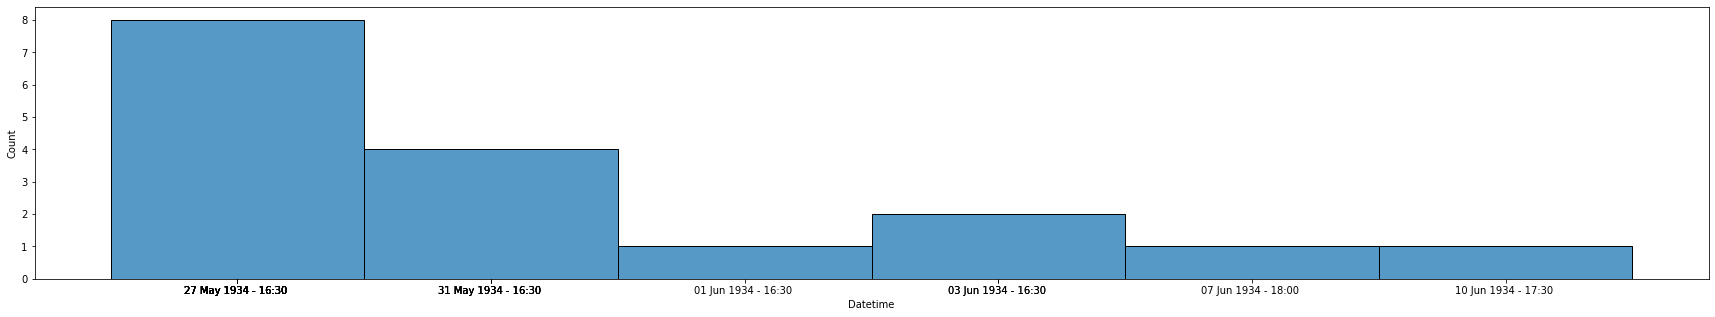

In [1379]:
#Histograma distribuição de jogos p/ dia
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 5))
ax = sns.histplot(data = copa_completa[copa_completa['Year'] == 1934][['Home Team Goals', 'Datetime']],

x = 'Datetime',
  binwidth = 10).set(xticks = np.array(copa_completa[copa_completa['Year'] == 1934]['Datetime']))

In [1380]:
copa_completa[copa_completa['Year'] == 1934][['Home Team Goals', 'Datetime']]

,Home Team Goals,Datetime
18,3.0,27 May 1934 - 16:30
19,4.0,27 May 1934 - 16:30
20,3.0,27 May 1934 - 16:30
21,3.0,27 May 1934 - 16:30
22,5.0,27 May 1934 - 16:30
23,3.0,27 May 1934 - 16:30
24,7.0,27 May 1934 - 16:30
25,2.0,27 May 1934 - 16:30
26,3.0,31 May 1934 - 16:30
27,2.0,31 May 1934 - 16:30


In [1381]:
#Cria uma tabela de média de gols marcados por copa
copa_completa['media_gols_por_jogo'] = copa_completa['GoalsScored'] / copa_completa['MatchesPlayed']

In [1382]:
copa_completa.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_year,media_gols_por_jogo
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889


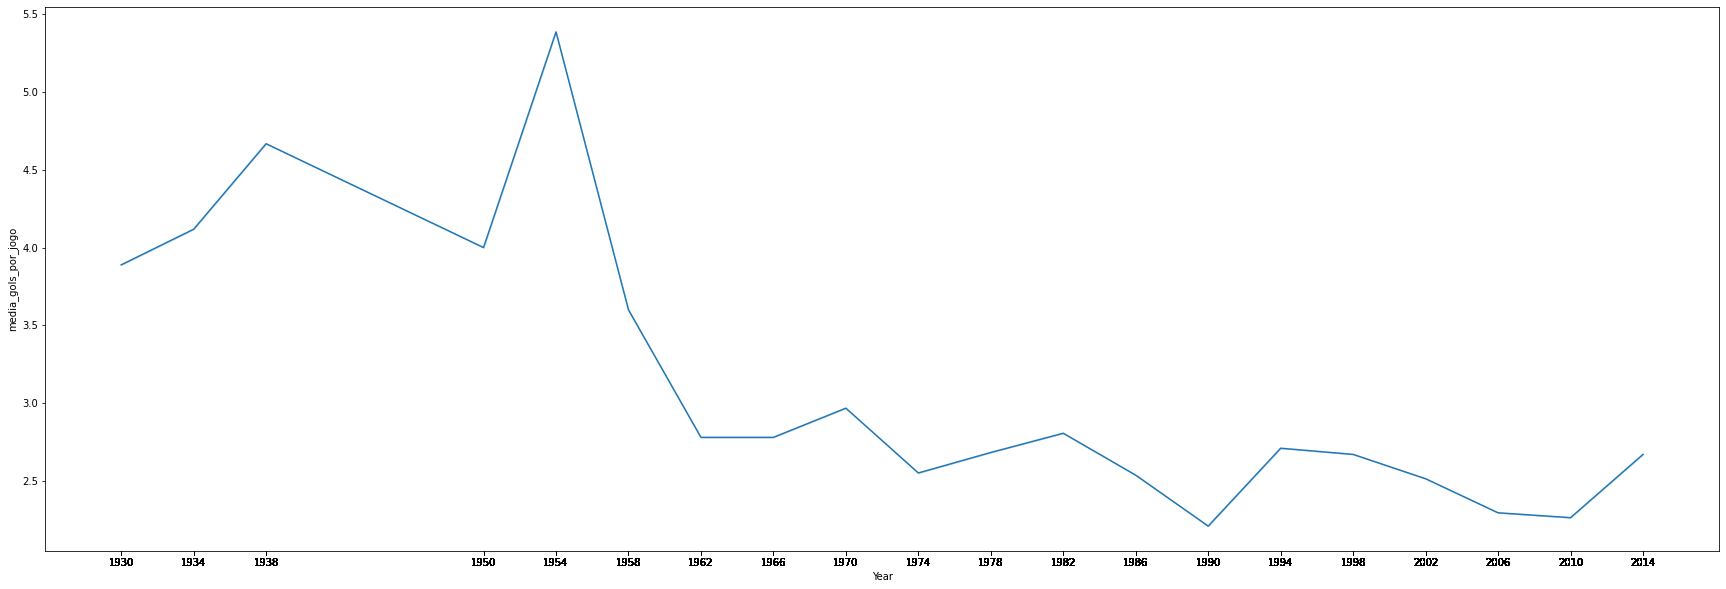

In [1383]:
plt.figure(figsize = (30,10))
ax = sns.lineplot(
    x= 'Year',
    y = 'media_gols_por_jogo',
    data = copa_completa
).set(xticks = np.array(copa_completa['Year']))

In [1384]:
copa_completa.groupby('Year')['media_gols_por_jogo'].mean().reset_index()

,Year,media_gols_por_jogo
0,1930,3.888889
1,1934,4.117647
2,1938,4.666667
3,1950,4.000000
4,1954,5.384615
5,1958,3.600000
6,1962,2.781250
7,1966,2.781250
8,1970,2.968750
9,1974,2.552632


###Quais países já venceram a copa?

In [1385]:
copa_completa.groupby('Winner').agg(numero_vitorias=('Year', 'nunique')).sort_values(by = 'numero_vitorias', ascending = False).reset_index()

,Winner,numero_vitorias
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Germany,1
8,Spain,1


###Quantos gols cada país fez no total?

In [1386]:
copa_completa.groupby('Away Team Name')['Away Team Goals'].sum().reset_index().head()

,Away Team Name,Away Team Goals
0,Algeria,9.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0


In [1387]:
gols_por_pais_visitante = copa_completa.groupby('Away Team Name').agg(gols = ('Away Team Goals', 'sum'), jogos = ('Away Team Name', 'count')).reset_index()

In [1388]:
gols_por_pais_visitante.head()

,Away Team Name,gols,jogos
0,Algeria,9.0,8
1,Angola,1.0,2
2,Argentina,22.0,27
3,Australia,4.0,7
4,Austria,12.0,16


In [1389]:
gols_por_pais_visitante = gols_por_pais_visitante.rename(columns={'Away Team Name': 'pais', 'Away Team Goals': 'gols'})
gols_por_pais_visitante['mandante'] = 0
gols_por_pais_visitante['visitante'] = 1

In [1390]:
gols_por_pais_visitante.head()

,pais,gols,jogos,mandante,visitante
0,Algeria,9.0,8,0,1
1,Angola,1.0,2,0,1
2,Argentina,22.0,27,0,1
3,Australia,4.0,7,0,1
4,Austria,12.0,16,0,1


In [1391]:
gols_por_pais_mandante = copa_completa.groupby('Home Team Name').agg(gols = ('Home Team Goals', 'sum'), jogos = ('Home Team Name', 'count')).reset_index()
gols_por_pais_mandante = gols_por_pais_mandante.rename(columns={'Home Team Name': 'pais',
                                                                'Home Team Goals': 'gols'})
gols_por_pais_mandante['mandante'] = 1
gols_por_pais_mandante['visitante'] = 0 

In [1392]:
gols_completa = gols_por_pais_mandante.append(gols_por_pais_visitante)

In [1393]:
gols_completa.head()

,pais,gols,jogos,mandante,visitante
0,Algeria,5.0,6,1,0
1,Angola,0.0,1,1,0
2,Argentina,111.0,54,1,0
3,Australia,7.0,6,1,0
4,Austria,31.0,13,1,0


In [1394]:
gols_completa_agrupada = gols_completa.groupby('pais')[['jogos', 'gols']].sum().sort_values('jogos', ascending = False).reset_index()

In [1395]:
gols_completa_agrupada.head()

,pais,jogos,gols
0,Brazil,108,225.0
1,Italy,83,128.0
2,Argentina,81,133.0
3,England,62,79.0
4,Germany FR,62,131.0


In [1396]:
gols_completa_agrupada['media_gols_por_pais'] = gols_completa_agrupada['gols']/gols_completa_agrupada['jogos']

In [1397]:
gols_completa_agrupada.head()

,pais,jogos,gols,media_gols_por_pais
0,Brazil,108,225.0,2.083333
1,Italy,83,128.0,1.542169
2,Argentina,81,133.0,1.641975
3,England,62,79.0,1.274194
4,Germany FR,62,131.0,2.112903
